In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm

In [4]:
def generation(n, alpha=1.7, beta=0.9, gamma=10, delta=10):
    # Initialize samples array with zeros
    sample = np.zeros(n)
    
    # Constants that do not depend on the sample index and thus can be computed once
    if alpha != 1:
        S_alpha_beta = (1 + beta ** 2 * np.tan(np.pi * alpha / 2) ** 2) ** (1 / (2 * alpha))
        B_alpha_beta = (1 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))

    for i in range(n):
        U = np.random.uniform(-np.pi/2, np.pi/2)
        W = -np.log(1 - np.random.uniform(0,1))
        
        # Handle the case alpha = 1 separately
        if alpha != 1:
            part1 = np.sin(alpha * (U + B_alpha_beta)) / (np.cos(U) ** (1 / alpha))
            part2 = (np.cos(U - alpha * (U + B_alpha_beta)) / W) ** ((1 - alpha) / alpha)
            sample[i] = S_alpha_beta * part1 * part2
        else:
            sample[i] = (2 / np.pi) * ((np.pi / 2 + beta * U) * np.tan(U) - beta * np.log((np.pi / 2 * W * np.cos(U))/(np.pi+beta*U)))

    # Apply scaling and location shifting
    sample = gamma * sample + delta
    return sample

In [5]:
default = generation(n=1000)

In [6]:
def gaussian_ker(u=0, y=0, epsilon=1):
    """gaussian kernel for weights
    
    Parameters
    -------------------
    y : float, or array-like
    the point we have, the output

    u : float, or array-like
    the point from which we want to calculate a weight

    epsilon : int, float
    the scale parameter for which we want to compute the kernel
    ----------
    """

    w = (1/np.sqrt(2*np.pi*(epsilon**2)))*np.exp(-(np.abs((u-y)))**2/(2*(epsilon**2)))
    return w

In [7]:
def zolotarev_transfo(sample, xi=0.25):
    """function to use for the estimation based on the zolotarev transformation

    Parameters
    --------------------------
    Sample : array-like
    Sample to do the transformation on

    xi : int, float
    The constant used in the transformation
    --------------------------
    """
    if xi<=0 or xi>1/2 :
        raise ValueError('Xi must be between 0 and 1/2')
    taille = len(sample)
    Z = []
    for i in range(int(taille/3)):
        transfo = sample[3*i-2] - xi*sample[3*i-1] - (1 - xi)*sample[3*i]
        Z.append(transfo)
    V = []
    U = []
    for i in range(len(Z)):
        V.append(np.log(np.abs(Z[i])))
        U.append(np.sign(sample[i]))
    V = np.array(V)
    U = np.array(U)
    S_U_squared = (np.std(U))**2
    S_V_squared = (np.std(V))**2
    nu_tilde = (6/(np.pi)**2)*S_V_squared - (3/2)*S_U_squared + 1
    etha_hat = np.mean(U)
    tau_hat = np.mean(V)
    nu_hat = 0
    if nu_tilde > ((1+np.abs(etha_hat))**2)/4:
        nu_hat = nu_tilde
    else:
        nu_hat = ((1+np.abs(etha_hat))**2)/4
    delta_hat = np.mean(sample)
    S_2 = np.array((nu_hat, etha_hat, tau_hat, delta_hat))
    return S_2

In [8]:
zolo_y = np.zeros((1000, 4))

for i in range(1000):    
    y = generation(1000)
    zolo_y[i] = zolotarev_transfo(sample=y)

varcov = np.cov(m=zolo_y, rowvar=False)

# ABC accept reject

In [15]:
donnees = generation(n=1000)

In [16]:
nb_prior = 1000
epsilon_ar = 1.5

In [17]:
prior_alpha_ar = np.random.uniform(1.1, 2., size=nb_prior)
prior_beta_ar = np.random.uniform(-1., 1, size=nb_prior)
prior_gamma_ar = np.random.uniform(0., 300., size=nb_prior)
prior_delta_ar = np.random.uniform(-300., 300., size=nb_prior)
prior_gen_ar = np.vstack((prior_alpha_ar,prior_beta_ar,prior_gamma_ar, prior_delta_ar))
prior_gen_ar = np.transpose(prior_gen_ar)

In [18]:
zolo_aimed = zolotarev_transfo(sample=donnees)

In [19]:
zolo_proposal = np.zeros((nb_prior, 4))
param_accepted = np.zeros(4)
for i in range(nb_prior):
    proposal = generation(n=1000, alpha=prior_gen_ar[i,0],
                          beta=prior_gen_ar[i,1], gamma=prior_gen_ar[i,2], delta=prior_gen_ar[i,3])
    zolo_proposal[i] = zolotarev_transfo(sample=proposal)
    if np.linalg.norm(zolo_aimed - zolo_proposal[i])<epsilon_ar:
        param_accepted = np.vstack((param_accepted,prior_gen_ar[i]))

        
        

In [20]:
test_8 = generation(n=10000)
test_9 = generation(n=10000, alpha = 1.8, beta=0.8, gamma=8, delta=9)
zolo_8 = zolotarev_transfo(test_8)
zolo_9 = zolotarev_transfo(test_9)
np.linalg.norm(zolo_8-zolo_9)

1.1167391146204948

In [22]:
param_accepted.shape

(2, 4)

Très petite acceptance rate

In [23]:
param_accepted = np.delete(arr=param_accepted, obj=0, axis=0)

In [24]:

mille = np.linspace(start=100, stop=1000, endpoint=True, num=10)[::-1]
cent = np.linspace(start=10, stop=100, endpoint=False, num=90)[::-1]
dix = np.linspace(start=5, stop=10, endpoint=False, num=10)[::-1]
cinq = np.linspace(start=3, stop=5, endpoint=False, num=40)[::-1]
trois = np.linspace(start=0, stop=3, endpoint=False, num=300)
trois = np.delete(arr=trois, obj=0)
trois = trois[::-1]

scale_param = np.concatenate((mille, cent, dix, cinq, trois))


In [25]:
nb_prior = 5000

In [26]:
prior_alpha_ar = np.random.uniform(1.1, 2., size=nb_prior)
prior_beta_ar = np.random.uniform(-1., 1, size=nb_prior)
prior_gamma_ar = np.random.uniform(0., 300., size=nb_prior)
prior_delta_ar = np.random.uniform(-300., 300., size=nb_prior)
prior_gen_ar = np.vstack((prior_alpha_ar,prior_beta_ar,prior_gamma_ar, prior_delta_ar))
prior_gen_ar = np.transpose(prior_gen_ar)

In [27]:
matrix_gen = np.zeros((nb_prior,4))
for i in tqdm(range(nb_prior)):
    proposal = generation(n=100000, alpha=prior_gen_ar[i,0],
                          beta=prior_gen_ar[i,1], gamma=prior_gen_ar[i,2], delta=prior_gen_ar[i,3])
    zolo_proposal = zolotarev_transfo(sample=proposal)
    matrix_gen[i] = zolo_proposal

100%|██████████| 5000/5000 [46:56<00:00,  1.78it/s] 


In [32]:
parametres_epsilon = np.zeros((449,4))
for j in tqdm(range(449)):
    param_accepted = np.zeros(4)
    for i in range(nb_prior):
        if np.linalg.norm(zolo_aimed - matrix_gen[i])<scale_param[j]:
            param_accepted = np.vstack((param_accepted,prior_gen_ar[i]))
    param_accepted = np.delete(arr=param_accepted, obj=0, axis=0)
    param_accepted_i = np.mean(param_accepted, axis=0)
    parametres_epsilon[j] = param_accepted_i




100%|██████████| 449/449 [00:07<00:00, 59.95it/s]


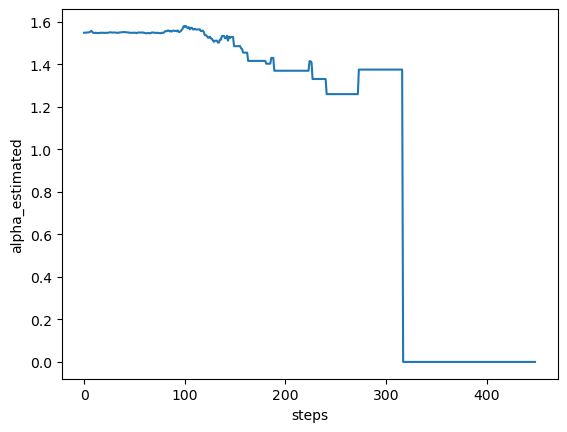

In [48]:
plt.plot(parametres_epsilon[:,0])
plt.ylabel('alpha_estimated')
plt.xlabel('steps')
plt.show()

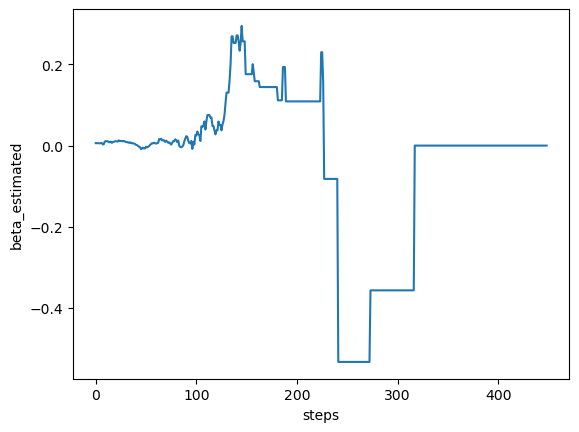

In [49]:
plt.plot(parametres_epsilon[:,1])
plt.ylabel('beta_estimated')
plt.xlabel('steps')
plt.show()

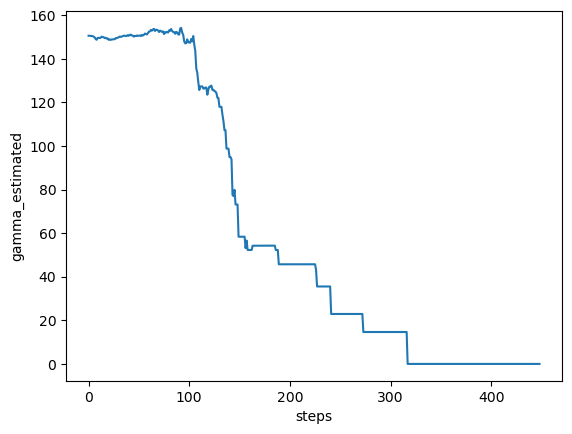

In [50]:
plt.plot(parametres_epsilon[:,2])
plt.ylabel('gamma_estimated')
plt.xlabel('steps')
plt.show()

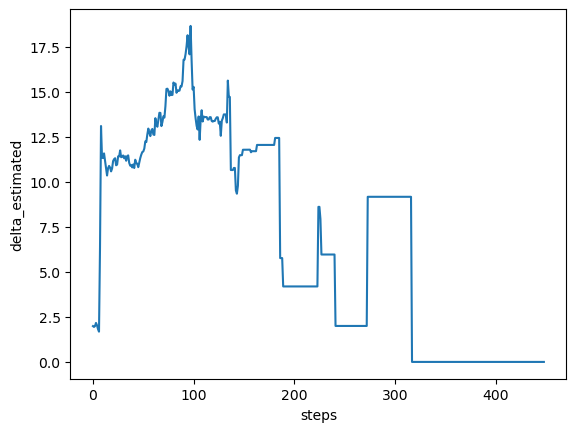

In [51]:
plt.plot(parametres_epsilon[:,3])
plt.ylabel('delta_estimated')
plt.xlabel('steps')
plt.show()

In [45]:
scale_param[300]

1.49

In [46]:
scale_param[200]

2.49